<a href="https://colab.research.google.com/github/Shalinda99/fyp-HFI-module/blob/main/LB_FINANCE_plc_Close_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
from google.colab import files



drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Load the dataset
price_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/SP_SL_20_dataset_final.csv')
price_df.head()

,Trade Date,Open (Rs.),High (Rs.),Low (Rs.),Close (Rs.),TradeVolume,ShareVolume,Turnover (Rs.),Company Name
0,1/31/2025,120.75,121.5,119.00,119.50,523,1016885,122167426.0,SAMPATH BANK PLC
1,1/30/2025,119.75,120.5,118.75,120.00,587,1279402,152615285.3,SAMPATH BANK PLC
2,1/29/2025,122.00,122.0,118.50,119.25,1354,2563188,307574122.8,SAMPATH BANK PLC
3,1/28/2025,122.00,122.5,121.00,121.25,838,990361,120261351.3,SAMPATH BANK PLC
4,1/27/2025,122.00,123.0,121.50,122.00,694,895710,109462379.0,SAMPATH BANK PLC


In [ ]:
lbf_plc_price_df = price_df[price_df['Company Name'] == "LB FINANCE PLC"]

In [ ]:
lbf_plc_price_df['Trade Date'] = pd.to_datetime(lbf_plc_price_df['Trade Date']).dt.date

/tmp/ipython-input-4-1758786476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lbf_plc_price_df['Trade Date'] = pd.to_datetime(lbf_plc_price_df['Trade Date']).dt.date


In [ ]:
lbf_plc_price_df

,Trade Date,Open (Rs.),High (Rs.),Low (Rs.),Close (Rs.),TradeVolume,ShareVolume,Turnover (Rs.),Company Name
18903,2025-01-31,93.3,93.3,91.0,92.4,160,234524,21571221.4,LB FINANCE PLC
18904,2025-01-30,93.2,93.5,92.3,93.0,99,178055,16552733.6,LB FINANCE PLC
18905,2025-01-29,93.0,93.5,92.2,93.1,55,140857,13083234.9,LB FINANCE PLC
18906,2025-01-28,92.8,94.0,91.5,92.5,98,403567,37270709.8,LB FINANCE PLC
18907,2025-01-27,91.9,92.8,90.2,92.0,224,1479338,134523254.5,LB FINANCE PLC
...,...,...,...,...,...,...,...,...,...
20077,2020-01-08,157.1,160.0,155.0,155.5,18,2857,446709.8,LB FINANCE PLC
20078,2020-01-07,157.5,160.0,157.5,160.0,34,234021,37442935.0,LB FINANCE PLC
20079,2020-01-06,164.9,164.9,157.5,157.5,13,103497,16559862.0,LB FINANCE PLC
20080,2020-01-03,154.0,160.0,154.0,159.3,82,217849,34622906.0,LB FINANCE PLC


In [ ]:
import matplotlib.pyplot as plt

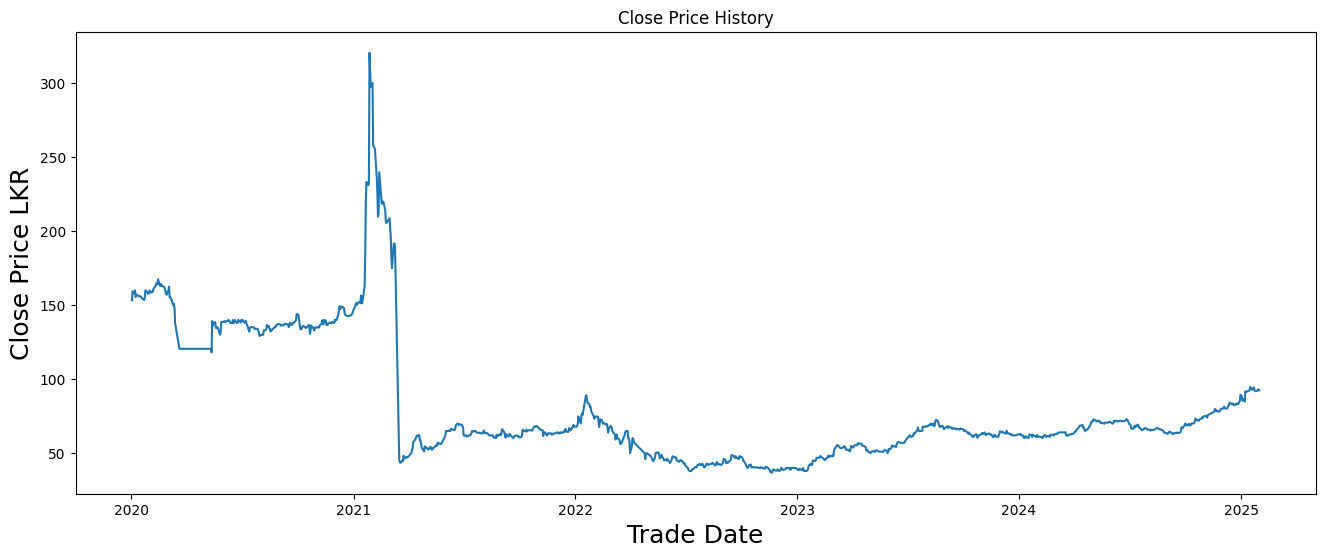

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(lbf_plc_price_df['Trade Date'],lbf_plc_price_df['Close (Rs.)'])
plt.xlabel('Trade Date', fontsize=18)
plt.ylabel('Close Price LKR', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column
data = lbf_plc_price_df.filter(['Close (Rs.)'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1121

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.19598167],
       [0.19809658],
       [0.19844907],
       ...,
       [0.42544942],
       [0.43179415],
       [0.41064505]])

In [ ]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.19598167, 0.19809658, 0.19844907, 0.19633416, 0.19457173,
       0.19421925, 0.19809658, 0.20303137, 0.20197392, 0.19739161,
       0.20162143, 0.20444131, 0.19598167, 0.19280931, 0.19280931,
       0.19386676, 0.16919281, 0.17553754, 0.1716602 , 0.18258724,
       0.18575961, 0.17130772, 0.16284808, 0.16425802, 0.1646105 ,
       0.16179062, 0.16108565, 0.1646105 , 0.1646105 , 0.16284808,
       0.1646105 , 0.16637293, 0.1600282 , 0.15932323, 0.15579838,
       0.1529785 , 0.15262601, 0.15579838, 0.15720832, 0.15403595,
       0.15262601, 0.15227353, 0.1505111 , 0.14663377, 0.14522383,
       0.14522383, 0.14839619, 0.14628128, 0.14945365, 0.15227353,
       0.1459288 , 0.14205146, 0.14169898, 0.14099401, 0.13958407,
       0.13817413, 0.13535425, 0.13112443, 0.13535425, 0.13464928])]
[np.float64(0.13464927740571025)]

[array([0.19598167, 0.19809658, 0.19844907, 0.19633416, 0.19457173,
       0.19421925, 0.19809658, 0.20303137, 0.20197392, 0.19739161,
       0.20162143, 0.20

In [ ]:
!pip install keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# # Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# # Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=20)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 60s 49ms/step - loss: 0.0028
Epoch 2/20
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 85s 52ms/step - loss: 6.7061e-04
Epoch 3/20
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 80s 50ms/step - loss: 0.0011
Epoch 4/20
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 84s 52ms/step - loss: 0.0012
Epoch 5/20
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 56s 53ms/step - loss: 0.0017
Epoch 6/20
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 82s 54ms/step - loss: 9.0074e-04
Epoch 7/20
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 77s 49ms/step - loss: 0.0016
Epoch 8/20
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 53s 50ms/step - loss: 0.0010
Epoch 9/20
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 54s 51ms/step - loss: 0.0017
Epoch 10/20
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 83s 52ms/step - loss: 8.9246e-04
Epoch 11/20
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 81s 51ms/step - loss: 3.6235e-04
Epoch 12/20
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 54s 51ms/step - loss: 0.0014
Epoch 13/20
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - loss: 5.1878e-04
Epoch 14/20
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 85s 54ms/s

In [ ]:
model.save('/content/drive/My Drive/FYP/lbfinance_plc_lstm_model.h5')

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


np.float64(5.731146259737446)

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2}")

R-squared: 0.7841157986392735


/tmp/ipython-input-16-1041969288.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


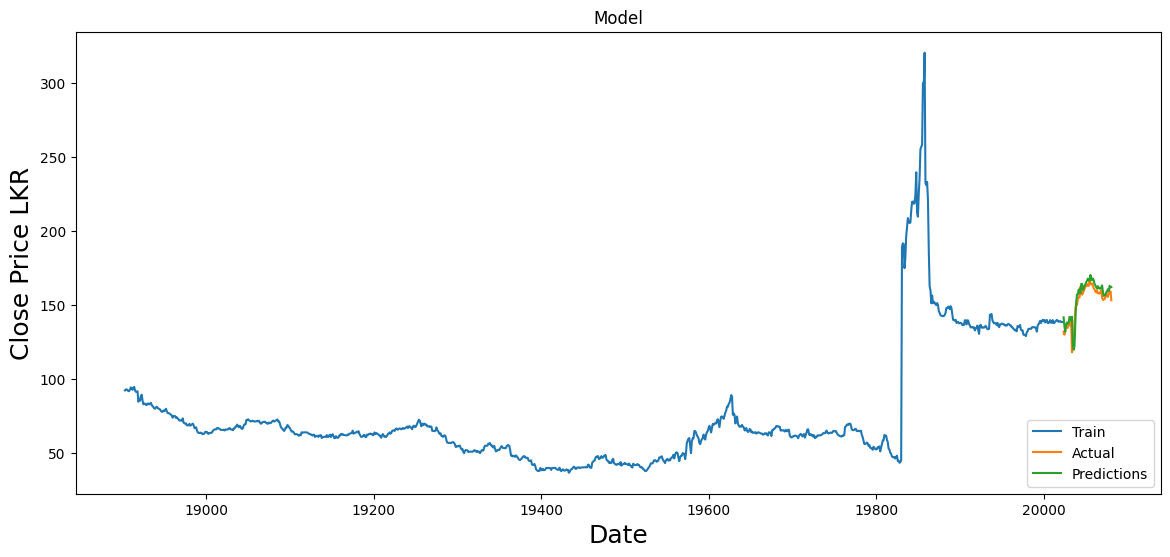

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(14,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price LKR', fontsize=18)
plt.plot(train['Close (Rs.)'])
plt.plot(valid[['Close (Rs.)', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.show()